https://www.kaggle.com/yasserh/wine-quality-dataset


In [1]:
#imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import ceil 
import seaborn as sns

In [2]:
df=pd.read_csv("WineQT.csv")
print("shape info {}".format(df.shape))
df.head()
df.dtypes

shape info (1143, 13)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Treating outliers: looking at the describe pH, alcohol,chlorides,density

have no outliers

In [4]:
df=df.drop(["Id"],axis=1)
df["total sulfur dioxide"].value_counts().sort_index()
#278.0     1
df=df[df["total sulfur dioxide"] < 200.0]


df["volatile acidity"].value_counts().sort_index()
#no real outlier

df["citric acid"].value_counts().sort_index()
#1.00
df=df[df["citric acid"] < 1.00]

df["residual sugar"].value_counts().sort_index()
#no real outlier

df["free sulfur dioxide"].value_counts().sort_index()
#no real outlier

df["total sulfur dioxide"].value_counts().sort_index()
#no real outlier

df["sulphates"].value_counts().sort_index()
#no real outlier

0.33    1
0.39    5
0.40    4
0.42    4
0.43    5
       ..
1.36    2
1.56    1
1.61    1
1.62    1
1.95    2
Name: sulphates, Length: 88, dtype: int64

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,8.311053,0.531754,0.267000,2.521272,0.086539,15.562719,45.477632,0.996734,3.312044,0.656789,10.439766,5.656140
std,1.749612,0.179607,0.194982,1.335724,0.044691,10.211257,31.267716,0.001920,0.155441,0.165805,1.080376,0.803421
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.398750,0.090000,1.900000,0.070000,7.000000,21.000000,0.995578,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996690,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997842,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.611000,68.000000,165.000000,1.003690,4.010000,1.950000,14.900000,8.000000


<AxesSubplot:xlabel='fixed acidity'>

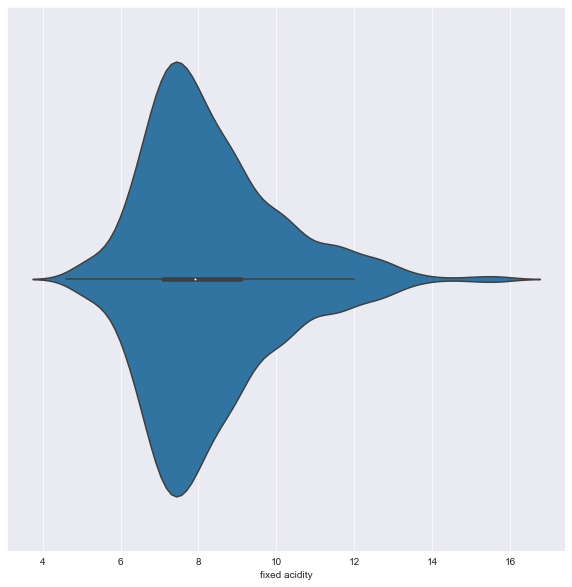

In [9]:
sns.set_style('darkgrid')

plt.figure(1,figsize=(10,10))
sns.violinplot(data=df,x="fixed acidity")
